# 1 - Importing Dependecies 

In [2]:
from trainingmonitor import TrainingMonitor
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
import numpy as np 
import random
import cv2
import os



import time
from datetime import datetime

# 1.1 - Data Pipeline 

In [3]:
workingDir = 'E:\Machine Learning\Real Data Test\data\main\\'


In [4]:
os.listdir()

## Data Directory Path
print('#1 - Initialzing DataFrame...\n')
imageID_Path = os.listdir(workingDir)

## Creating data frame based on directory contents 
imagePath_df = pd.DataFrame({'ID':[n.split('.')[0] for n in imageID_Path],
                                'Path':[workingDir + n for n in imageID_Path]})

## Extracting features of images from the CSV file
csv_dataPath = os.path.join(workingDir,'data_compressed.csv')
imageFeatures_df = pd.read_csv(csv_dataPath, sep=',', encoding = 'ISO-8859-1')

## COnvoerting all values to integer values
imagePath_df["ID"]= pd.to_numeric(imagePath_df["ID"],errors='coerce')



## Error handling for none JPEG Images

for i,row in imagePath_df.iterrows():
    picture_Path = row['Path']
    # print(picture_Path)
    extCheck = len(picture_Path)
    path = picture_Path[extCheck-4:]
    if (path != 'JPEG'):
        print("Path Dropped:", path)
        imagePath_df.drop(i, inplace=True)


print( "Numbers of Images succefully imported:",len(imagePath_df))




#1 - Initialzing DataFrame...

Path Dropped: .csv
Path Dropped: .csv
Numbers of Images succefully imported: 4116


In [5]:
merged_df = pd.merge(left=imagePath_df, right=imageFeatures_df, on='ID', how='inner', )

print('Merging Dataframes...')

Merging Dataframes...


# 2 - Cleaning Data

In [6]:
## Validating the data
print('Cleaning Data...')


merged_df['Hammer Price'] = pd.to_numeric(merged_df['Hammer Price'], errors='coerce')

merged_df = merged_df.replace(np.nan, 0)

# merged_df['Low Estimation Price'].replace(np.nan, 0)

means = []

for i, row in merged_df.iterrows():

    if(row['Low Estimation Price'] == 0 and row['High Estimation Price'] == 0):
        mean = row['Hammer Price'] / 2
    
    # elif (row['Low Estimation Price'] == 0):
    #     mean = row['High Estimation Price'] / 2
    else:
        mean = (row['Low Estimation Price'] + row['High Estimation Price']) / 2
    means.append(mean)
    if(row['Hammer Price'] == 0.0): 
        merged_df.loc[i, 'Hammer Price'] = mean


# 
merged_df['Mean Estimation'] = pd.Series(means)


Cleaning Data...


# 3 - Data Validation

In [7]:
print('Normalizing Data...')
CntRem = 0
for i in range(len(merged_df)):
        picture_Path = merged_df.at[i,'Path']
        if not os.path.exists(picture_Path):
                print("Oops! File gone on vacation:", picture_Path)
        # os.remove(merged_df.at[i,'Path'])
        # merged_df.drop(merged_df.at[merged_df.index[i]], axis=0)

        # print("Image", merged_df.at[i,'ID']," to be removed")

# print("Total number of files removed", CntRem)

Normalizing Data...


# 4 - Loading Images to dataframe

In [8]:
# ##Creating List for Compressed Numpy array data paths
import os.path 

test_df = merged_df


images = []
id = []
IMAGE_RESIZE = (256,256)


for i, row in merged_df.iterrows():

    ## ASsigning iamge path the picture path
    picture_Path = row['Path']
    iD = row = row["ID"]

    if os.path.exists(picture_Path):
        # Reading Image Path, Color Correcting, and then resizing
        pic_bgr_arr = cv2.imread(picture_Path)
        
        if(pic_bgr_arr is not None):
            pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)
            pic_rgb_arr = cv2.resize(pic_rgb_arr, IMAGE_RESIZE)
            pic_rgb_arr = pic_rgb_arr / 255.0
        else:
            print("Error with Image", picture_Path)
            # os.remove(picture_Path)
            # merged_df.drop(i, inplace=True)

        # Append to Image List
        images.append(pic_rgb_arr)
        id.append(iD)
    
    else:
        continue
       
    

# ZIP contents to load into datafram
dfData = list(zip(id, images))
images_df = pd.DataFrame(dfData, columns=['ID', 'Image'])


In [9]:
# // merging with dataframe
merged_df = pd.merge(left=merged_df, right=images_df, on='ID', how='inner')



# 6 - One Hot Encoding

In [10]:
merged_df.head()

,ID,Path,Artist,Low Estimation Price,High Estimation Price,Hammer Price,Size,Medium,Mean Estimation,Image
0,500.0,E:\Machine Learning\Real Data Test\data\main\5...,Ole Kielberg,0.0,420.0,294.0,42cm-59cm(16.54in-23.23in),Oil,210.0,"[[[0.5254901960784314, 0.5058823529411764, 0.4..."
1,0.0,E:\Machine Learning\Real Data Test\data\main\0...,Sam Nhlengethwa,216.0,324.0,540.0,30cm-33cm(11.81in-12.99in),Lithograph,270.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,3971.0,E:\Machine Learning\Real Data Test\data\main\3...,I. H. Brandt,210.0,280.0,448.0,12cm-17.5cm(4.72in-6.89in),Oil,245.0,"[[[0.7803921568627451, 0.7529411764705882, 0.6..."
3,3283.0,E:\Machine Learning\Real Data Test\data\main\3...,Sam Francis,6000.0,8000.0,21250.0,63.2cm-90.5cm(24.88in-35.63in),Lithograph,7000.0,"[[[1.0, 0.9921568627450981, 1.0], [1.0, 0.9882..."
4,3974.0,E:\Machine Learning\Real Data Test\data\main\3...,Svend Sinding Christensen,0.0,280.0,280.0,63.5cm-77cm(25in-30.31in),Oil,140.0,"[[[0.807843137254902, 0.8117647058823529, 0.77..."


<AxesSubplot:>

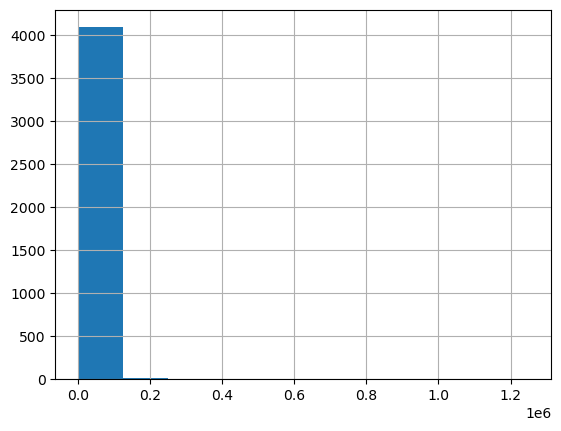

In [11]:
merged_df['Mean Estimation'].hist()

<AxesSubplot:>

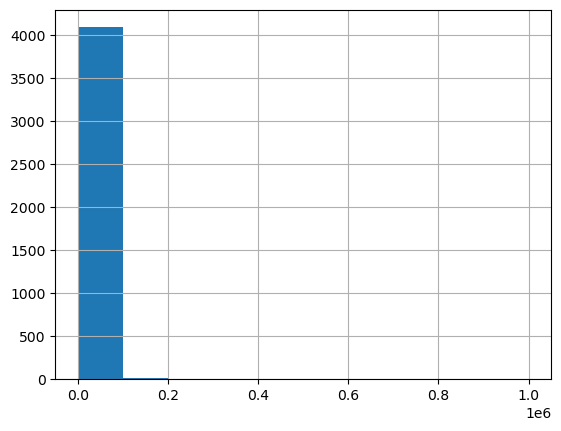

In [12]:
merged_df['Low Estimation Price'].hist()

<AxesSubplot:>

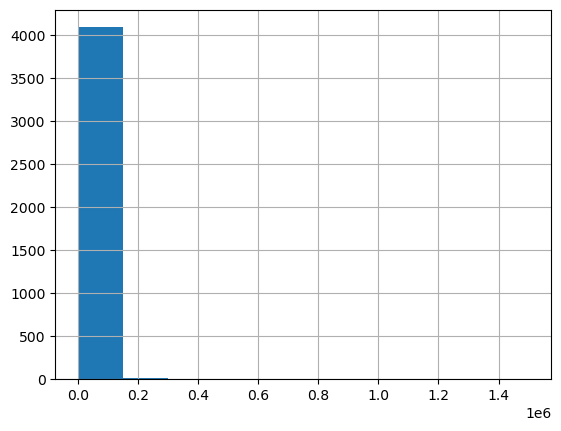

In [13]:
merged_df['High Estimation Price'].hist()

<AxesSubplot:>

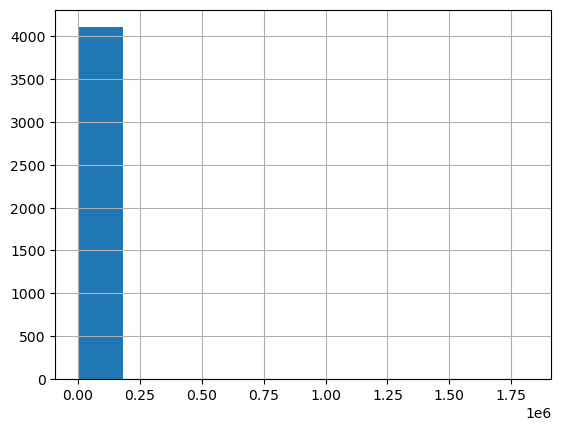

In [14]:
merged_df['Hammer Price'].hist()

In [15]:

# for i in range(len(merged_df)):
#     merged_df.loc[i, 'Mean Estimation'] = np.log(merged_df.at[i, 'Mean Estimation']) ** -1
#     merged_df.loc[i, 'Low Estimation Price'] = np.log(merged_df.at[i, 'Low Estimation Price']) ** -1
#     merged_df.loc[i, 'High Estimation Price'] = np.log(merged_df.at[i, 'High Estimation Price']) ** -1
#     merged_df.loc[i, 'Hammer Price'] = np.log(merged_df.at[i, 'Hammer Price']) ** -1




# merged_df.tail()

<AxesSubplot:>

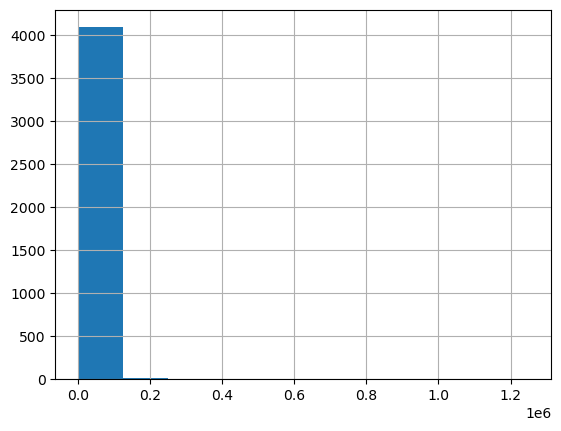

In [16]:
merged_df['Mean Estimation'].hist()


<AxesSubplot:>

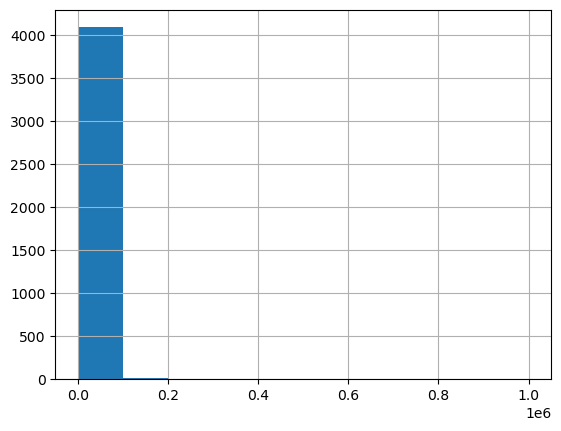

In [17]:
merged_df['Low Estimation Price'].hist()

<AxesSubplot:>

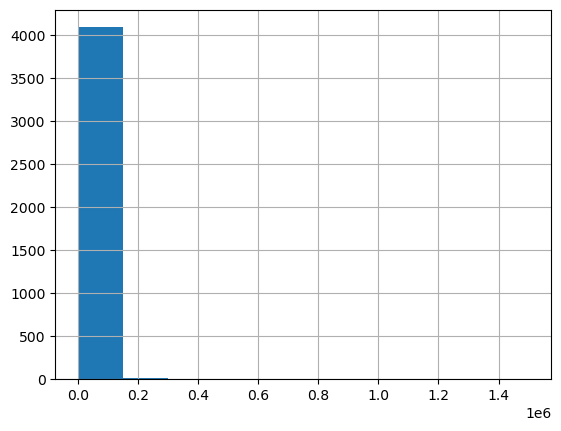

In [18]:
merged_df['High Estimation Price'].hist()

<AxesSubplot:>

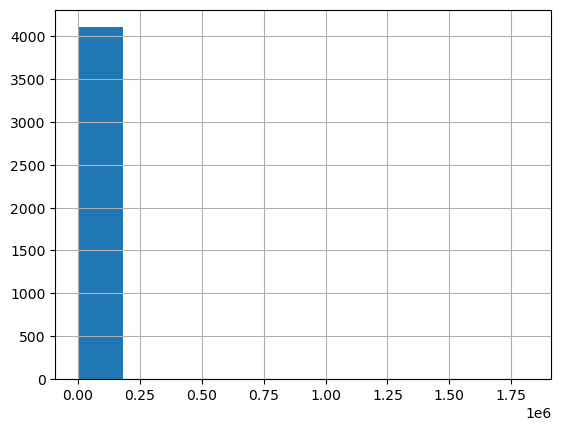

In [19]:
merged_df['Hammer Price'].hist()

In [20]:
merged_df.drop(['Low Estimation Price', 'High Estimation Price', 'Hammer Price', 'Size', 'Path', 'ID', 'Medium', "Artist" ],inplace=True, axis=1)
merged_df.head()

,Mean Estimation,Image
0,210.0,"[[[0.5254901960784314, 0.5058823529411764, 0.4..."
1,270.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,245.0,"[[[0.7803921568627451, 0.7529411764705882, 0.6..."
3,7000.0,"[[[1.0, 0.9921568627450981, 1.0], [1.0, 0.9882..."
4,140.0,"[[[0.807843137254902, 0.8117647058823529, 0.77..."


In [21]:

shuffled_df = merged_df.sample(frac=1)
train_df, val_df, test_df = shuffled_df[:3500], shuffled_df[3500:4000], shuffled_df[4000:]

len(train_df), len(val_df), len(test_df)


(3500, 500, 116)

In [22]:
train_df.head()

,Mean Estimation,Image
3698,5670.0,"[[[0.25882352941176473, 0.2196078431372549, 0...."
1398,1350.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1976,12500.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1684,280.0,"[[[0.7333333333333333, 0.6313725490196078, 0.2..."
1335,459.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [23]:


def get_X_y(df):

    dfArr = np.array(df)

    x_pic = []
    y_medium = []

    for i in range(len(df)): 

        pic = dfArr[i, 1]
        x_pic.append(pic)

        medium = dfArr[i, 0]
        y_medium.append(medium)

    X_pic = np.asarray(x_pic)
    y_medium = np.asarray(y_medium)


    return X_pic, y_medium 



In [24]:
X_train_pic, y_train = get_X_y(train_df)

X_val_pic,  y_val = get_X_y(val_df)

X_test_pic, y_test = get_X_y(test_df)

In [25]:
# # Y_train_art[0]
# X_train_picTensor = tf.convert_to_tensor(X_train_pic, dtype="float32")
# Y_trainEstTensor = tf.convert_to_tensor(Y_train_est, dtype="float32")

# X_val_picTensor = tf.convert_to_tensor(X_val_pic, dtype="float32")
# Y_valEstTensor = tf.convert_to_tensor(Y_val_est, dtype="float32")

# valData = [X_val_picTensor, Y_valEstTensor]


# 5 - Modeling

In [26]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import  Adam

import seaborn as sns
import os

In [27]:

# y_train_one_hot = to_categorical(y_train)
# y_val_one_hot = to_categorical(y_val)
# y_test_one_hot = to_categorical(y_test)

#############################

activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (256, 256, 3)))
feature_extractor.add(BatchNormalization())

# feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
# feature_extractor.add(BatchNormalization())
# feature_extractor.add(MaxPooling2D())

# feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
# feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(1, activation = 'relu')(x)

In [28]:
y_train.shape

(3500,)

In [29]:
# Make a new model combining both feature extractor and x
# optimizer = Adam(learning_rate=0.001)
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='sgd',loss ="mean_squared_logarithmic_error" , metrics = [ "accuracy"])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0     

In [30]:
# os.listdir("e:\\Machine Learning\\Real Data Test\\logs\\VisualPlot")

savePlots = "e:\\Machine Learning\\Real Data Test\\logs\\VisualPlot\\"
saveModel = "e:\\Machine Learning\\Real Data Test\\savedModels\\"

# os.getcwd()

In [31]:
date = datetime.today().strftime('%b-%d-%Y-%H-%M')

figPath = savePlots + 'FEE1-'+date 

In [32]:
modelSavePath = saveModel + "FEE1-" + date +'\\'+'FEE1.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [33]:
checkpoint = ModelCheckpoint(monitor='val_accuracy', filepath=modelSavePath, save_best_only=True )

In [34]:
print(modelSavePath)

e:\Machine Learning\Real Data Test\savedModels\FEE1-Apr-22-2023-16-37\FEE1.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5


In [35]:
callbacks = [TrainingMonitor(figPath), checkpoint]

Epoch 1/7
219/219 [==============================] - 623s 3s/step - loss: 3.4225 - accuracy: 0.0000e+00 - val_loss: 4.6566 - val_accuracy: 0.0000e+00
Epoch 2/7
219/219 [==============================] - ETA: 0s - loss: 2.5006 - accuracy: 0.0000e+00

NameError: name 'ax2' is not defined

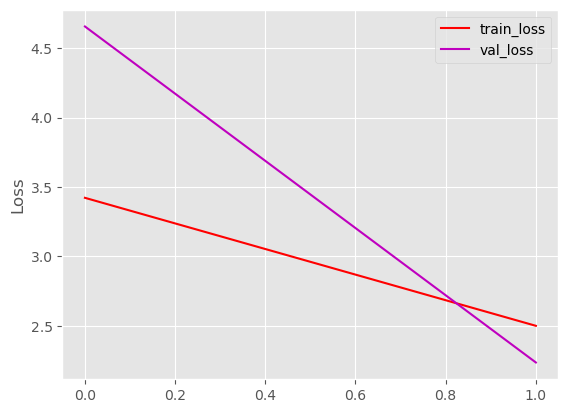

In [36]:
#Train the CNN model
history = cnn_model.fit(x=X_train_pic, y=y_train, batch_size=16, epochs=7, validation_data = (X_val_pic, y_val), callbacks=callbacks)

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction_NN = cnn_model.predict(X_test_pic)

In [ ]:
prediction_NN.shape

In [ ]:
# prediction_NN = np.argmax(prediction_NN, axis=-1)
y_test = encoder.inverse_transform(y_test)
prediction_NN = encoder.inverse_transform(prediction_NN)

In [ ]:
y_test.shape

In [ ]:
prediction_NN.shape

In [ ]:
results = list(zip(y_test, prediction_NN))
results_df = pd.DataFrame(results, columns=['Actual', 'Predicted'])

In [ ]:
results_df

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, prediction_NN)
# print(cm)
# sns.heatmap(cm, annot=True)


In [ ]:
n = 56

img = X_test_pic[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = cnn_model.predict(input_img).flatten()  #argmax to convert categorical back to original
prediction = encoder.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", y_test[n])

# 7 - Using Random Forest for Classification

In [ ]:
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(X_train_pic) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

y_train['OneHot'] = encoder.inverse_transform(y_train['OneHot'])

y_train['OneHot'] = le.fit_transform(merged_df['OneHot'])
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding



In [ ]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(X_test_pic)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])